# Data Processing and Modeling

I will be using the decision tree classification to help predict student performance.

In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score

from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

import numpy as np # Linear algebra
import matplotlib.pyplot as plt # Data visualization
import seaborn as sns # Statistical data visualization
%matplotlib inline

In [2]:
# load dataset
df = pd.read_csv("C:/Users/niniw/Documents/Capstone 3 - Educational Analysis/student_prediction.csv")
df.head()

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [3]:
df.columns

Index(['STUDENTID', 'AGE', 'GENDER', 'HS_TYPE', 'SCHOLARSHIP', 'WORK',
       'ACTIVITY', 'PARTNER', 'SALARY', 'TRANSPORT', 'LIVING', 'MOTHER_EDU',
       'FATHER_EDU', '#_SIBLINGS', 'KIDS', 'MOTHER_JOB', 'FATHER_JOB',
       'STUDY_HRS', 'READ_FREQ', 'READ_FREQ_SCI', 'ATTEND_DEPT', 'IMPACT',
       'ATTEND', 'PREP_STUDY', 'PREP_EXAM', 'NOTES', 'LISTENS',
       'LIKES_DISCUSS', 'CLASSROOM', 'CUML_GPA', 'EXP_GPA', 'COURSE ID',
       'GRADE'],
      dtype='object')

## Spliting Testing and Training Data:

In [4]:
feature_cols = ['COURSE ID','AGE','GENDER','HS_TYPE','SCHOLARSHIP','WORK','PARTNER','SALARY','TRANSPORT','LIVING','MOTHER_EDU','FATHER_EDU','#_SIBLINGS','KIDS','MOTHER_JOB','FATHER_JOB','NOTES','LISTENS','LIKES_DISCUSS','CLASSROOM','STUDY_HRS','READ_FREQ','READ_FREQ_SCI','ATTEND_DEPT','IMPACT','ATTEND','PREP_STUDY','PREP_EXAM','GRADE','CUML_GPA']
X = df[feature_cols]
y = df.EXP_GPA

In [5]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [6]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((101, 30), (44, 30))

## Determining which depth would be best for decision tree:

In [7]:
# List of values to try for max_depth:
depth_list = list(range(1,6))
depth_tuning = np.zeros((len(depth_list), 2))
depth_tuning[:,0] = depth_list

for index in range(len(depth_list)):
    
    clf = DecisionTreeClassifier(max_depth = depth_list[index])
    clf.fit(X_train, y_train)
    pred_y_test = clf.predict(X_test)
    depth_tuning[index,1] = accuracy_score(y_test,pred_y_test)
    
col_names = ['Max_Depth','Accuracy']
print(pd.DataFrame(depth_tuning,columns=col_names))

   Max_Depth  Accuracy
0        1.0  0.500000
1        2.0  0.545455
2        3.0  0.636364
3        4.0  0.522727
4        5.0  0.545455


### Creating Decision Tree with Gini Index:

In [8]:
# Create Decision Tree classifer object
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

# Train Decision Tree Classifer
clf_gini.fit(X_train, y_train)

y_pred_gini = clf_gini.predict(X_test)
y_pred_gini_train = clf_gini.predict(X_train)

In [9]:
# Model Accuracy, how often is the classifier correct?
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred_gini))
print("Train Accuracy:",metrics.accuracy_score(y_train, y_pred_gini_train))

Test Accuracy: 0.6363636363636364
Train Accuracy: 0.6534653465346535


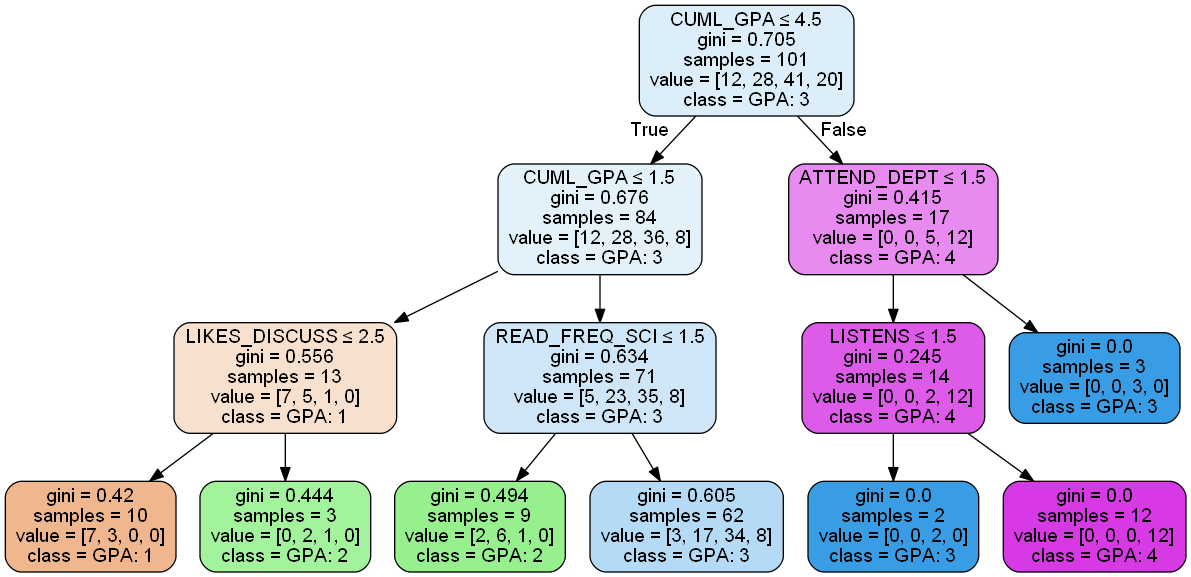

In [10]:
dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols, class_names=['GPA: 1','GPA: 2','GPA: 3','GPA: 4','GPA: 5'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('performance.png')
Image(graph.create_png())

### Creating Decision Tree with Entropy:

Now let's compare to entropy:

In [11]:
# Create Decision Tree classifer object
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3)

# Train Decision Tree Classifer
clf_entropy = clf_entropy.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_entropy = clf_entropy.predict(X_test)
y_pred_entropy_train = clf_entropy.predict(X_train)

# Model Accuracy, how often is the classifier correct?
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred_entropy))
print("Train Accuracy:",metrics.accuracy_score(y_train, y_pred_entropy_train))

Test Accuracy: 0.6363636363636364
Train Accuracy: 0.6534653465346535


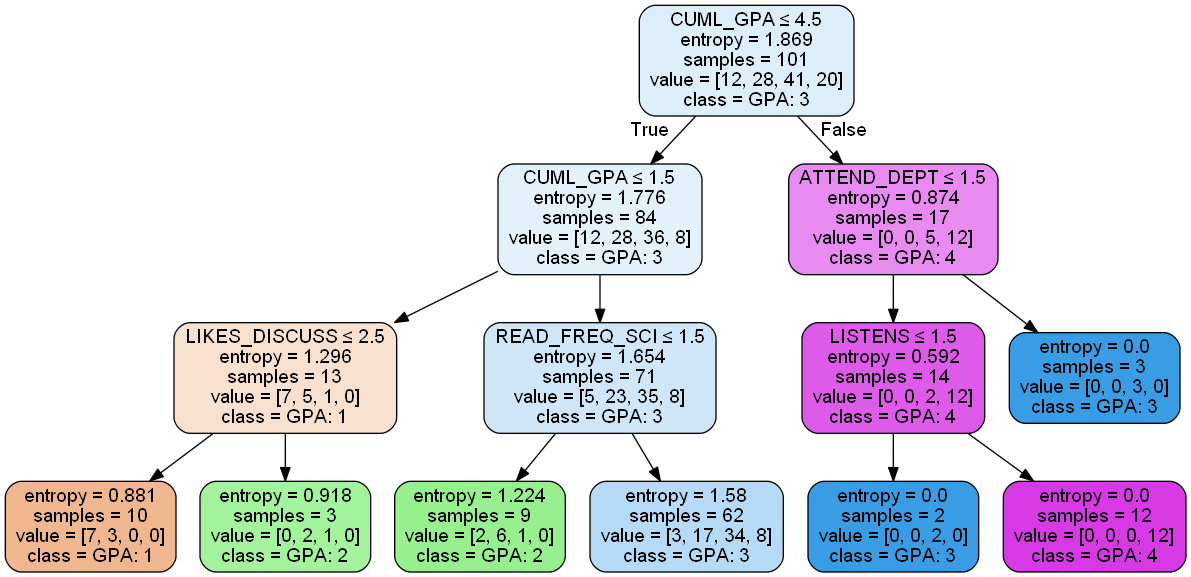

In [12]:
dot_data = StringIO()
export_graphviz(clf_entropy, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['GPA: 1','GPA: 2','GPA: 3','GPA: 4','GPA: 5'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('performance2.png')
Image(graph.create_png())

## Feature Importance:

It looks like both gini index and entropy result in the same accuracy and graph. Let's take a look at the feature importance used to make these decisions:

In [13]:
importance = clf_entropy.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %5f' % (i,v))

Feature: 0, Score: 0.000000
Feature: 1, Score: 0.000000
Feature: 2, Score: 0.000000
Feature: 3, Score: 0.000000
Feature: 4, Score: 0.000000
Feature: 5, Score: 0.000000
Feature: 6, Score: 0.000000
Feature: 7, Score: 0.000000
Feature: 8, Score: 0.000000
Feature: 9, Score: 0.000000
Feature: 10, Score: 0.000000
Feature: 11, Score: 0.000000
Feature: 12, Score: 0.000000
Feature: 13, Score: 0.000000
Feature: 14, Score: 0.000000
Feature: 15, Score: 0.000000
Feature: 16, Score: 0.000000
Feature: 17, Score: 0.121416
Feature: 18, Score: 0.077346
Feature: 19, Score: 0.000000
Feature: 20, Score: 0.000000
Feature: 21, Score: 0.000000
Feature: 22, Score: 0.124463
Feature: 23, Score: 0.096363
Feature: 24, Score: 0.000000
Feature: 25, Score: 0.000000
Feature: 26, Score: 0.000000
Feature: 27, Score: 0.000000
Feature: 28, Score: 0.000000
Feature: 29, Score: 0.580412


- Feature 17: LISTENS
- Feature 18: LIKES_DISCUSS
- Feature 22: READ_FREQ_SCI
- Feature 23: ATTEND_DEPT
- Feature  29: CUML_GPA

# Conclusion:

By using a decision tree classifier, we can get an accuracy score of around 0.64 or ~64%. The features that are most important are:
- If a student listens in class
- If a student likes to participate in class discussions and improves their interest in the course
- If a student reads scientific books often
- If a student attends class
- A students GPA from the past semester